In [1]:
from split_data import split
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid


In [2]:
source_path = "../Data/Original/Apple"
training_path = "../train_data/"
testing_path = "../test_data/"
train_test_ratio = 0.7
split(source_path, training_path, testing_path, train_test_ratio)

Finish splitting Apple___Cedar_apple_rust
[Training Samples:192, Testing Samples:83]   Original Samples:275
---------------------
Finish splitting Apple___Apple_scab
[Training Samples:441, Testing Samples:189]   Original Samples:630
---------------------
Finish splitting Apple___Black_rot
[Training Samples:435, Testing Samples:186]   Original Samples:621
---------------------
Finish splitting Apple___healthy
[Training Samples:1151, Testing Samples:494]   Original Samples:1645
---------------------
Total Training Samples: 2219, Testing Samples: 952, Total Samples: 3171


In [10]:
train_data = ImageFolder(training_path, transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

test_data = ImageFolder(testing_path,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

classes = train_data.classes

Label : Apple___Apple_scab


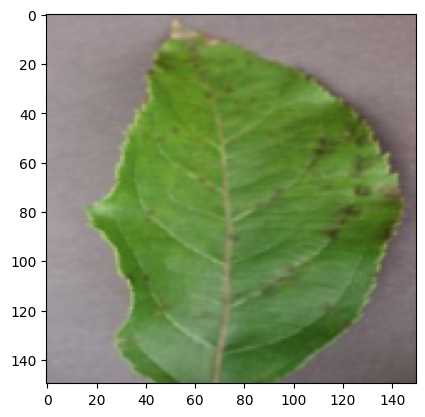

In [4]:
def display_img(img,label):
    print(f"Label : {train_data.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*train_data[0])

In [5]:
batch_size = 50
train_val_ratio = 0.8
val_size = int(np.round(len(train_data) * (1-train_val_ratio)))
train_size = len(train_data) - val_size 

train_data,val_data = random_split(train_data,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 1775
Length of Validation Data : 444


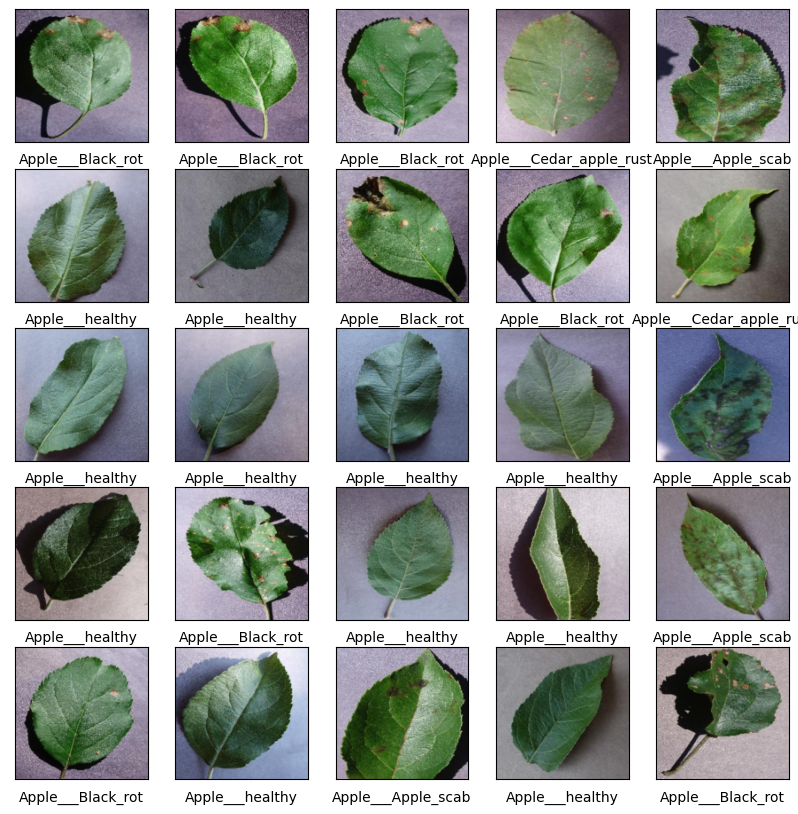

In [16]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=10).permute(1,2,0))
        break

def show_batch_with_labels(dl):
    plt.figure(figsize=(10,10))
    for images, labels in dl:
        for i in range(25):
            plt.subplot(5,5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[i].permute(1,2,0))
            plt.xlabel(classes[labels[i].item()])
        plt.show()
        break
        
show_batch_with_labels(train_dl)

In [15]:
for i in train_dl:
    print(type(i[1][1].item()))
    break

<class 'int'>


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x14e6650d0>
Traceback (most recent call last):
  File "/Users/afflatus/opt/miniconda3/envs/man/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/Users/afflatus/opt/miniconda3/envs/man/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/afflatus/opt/miniconda3/envs/man/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/Users/afflatus/opt/miniconda3/envs/man/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/Users/afflatus/opt/miniconda3/envs/man/lib/python3.8/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/Users/afflatus/opt/miniconda3/envs/man/lib/python3.8/selectors.py", 

In [7]:
for i in train_dl:
    print(len(i[1]))
    break

50
